In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from funcs.ffd import FFD, _get_multistar_factors

import time
tstamp = time.strftime("%d_%m_%Y_%H_%M", time.localtime())



In [106]:
df = pd.read_csv("../flare_tables/20200227_vetted_flares_lacking_some.csv",)
#                 names=['ampl_rec','cstart','cstop','ed_rec','ed_rec_err',
#                     'istart', 'istop','total_n_valid_data_points', 
#                     'tstart', 'tstop',  'dur', 'ed_ratio','ed_ratio_count',
#             'amplitude_ratio','amplitude_ratio_count','duration_ratio','duration_ratio_count',
#             'amplitude_corr','duration_corr','ed_corr','recovery_probability','recovery_probability_count',
#             'ed_ratio_std','amplitude_ratio_std','duration_ratio_std','recovery_probability_std',
#             'ed_corr_err','amplitude_corr_err','duration_corr_err',"TIC","sector","energy","st","real"
# ])
              
#spts = pd.read_csv("../flare_tables/spts.csv")
df = df[df.real==1]
obst = pd.read_csv("../flare_tables/obs_times.csv")
o = obst.groupby("TIC").time_years.sum().rename("target_time_years")
obst = obst.merge(o,on="TIC")
obst.st = obst.st.str[1:]

In [107]:
sttobs = obst.groupby("TIC").first().groupby("st").target_time_years.sum()

In [108]:
df[df.st==7]#.TIC.unique().shape[0]

,Unnamed: 0,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,...,duration_ratio_std,recovery_probability_std,ed_corr_err,amplitude_corr_err,duration_corr_err,TIC,sector,energy,st,real
0,231,0.762096,287775,287814,1552.753649,35.008459,1315,1354,18704,1627.145175,...,0.073609,0.200000,141.864028,0.046833,0.009807,454291779,12,2.25571E+034,7.0,1.0
5,68,0.999455,270340,270351,327.623519,6.905976,1898,1909,13204,1602.933193,...,0.528685,0.350605,29.992656,0.148482,0.001709,441000085,11,2.0024259E+032,7.0,1.0
10,341,0.340428,169356,169360,75.827426,2.951057,15854,15858,16349,1462.677195,...,0.690156,0.391005,12.723720,0.086276,0.002129,416744592,5,3.7873912E+032,7.0,1.0
92,388,0.129807,124505,124509,36.833998,1.958293,8873,8877,12835,1400.384513,...,0.325619,0.000000,9.246928,0.061454,0.004760,369555560,3,2.6497025E+032,7.0,1.0
93,389,0.188508,125109,125112,50.547769,2.488049,9453,9456,12835,1401.223408,...,0.410344,0.506712,10.412855,0.043752,0.001669,369555560,3,3.0132469E+032,7.0,1.0
108,24,0.088167,142074,142077,25.128534,2.846099,5688,5691,14058,1424.785961,...,0.240987,0.478518,14.768217,0.015260,0.015590,328254412,4,8.3821465E+031,7.0,1.0
109,21,0.100585,136253,136256,33.500336,3.336257,3969,3972,14058,1416.701146,...,0.240987,0.478518,19.605264,0.017410,0.015591,328254412,4,1.1620914E+032,7.0,1.0
110,23,0.207584,140253,140256,48.247803,2.126451,5378,5381,14058,1422.256767,...,0.442895,0.406533,8.650406,0.650184,0.002031,328254412,4,1.249345E+032,7.0,1.0
111,20,0.213360,133333,133337,51.403967,2.285151,1080,1084,14058,1412.645501,...,0.442895,0.406533,9.221115,0.668276,0.002708,328254412,4,1.3560751E+032,7.0,1.0
112,22,0.369029,137225,137251,434.885479,7.534113,4906,4932,14058,1418.051167,...,0.429626,0.185637,79.277755,0.030461,0.009423,328254412,4,1.1449396E+033,7.0,1.0


In [ ]:
plt.hist(df.recovery_probability_count, bins=np.linspace(0,50,10), histtype="step");

In [ ]:
plt.hist(df.ed_ratio_count, bins=np.linspace(0,50,10), histtype="step");

In [ ]:
plt.scatter(df.ampl_rec, df.amplitude_corr)
plt.plot([0,12],[0,12])

In [ ]:
plt.hist(df.amplitude_ratio_count, bins=np.linspace(0,300,10), histtype="step");

In [ ]:
plt.hist(df.duration_ratio_count, bins=np.linspace(0,300,10), histtype="step");

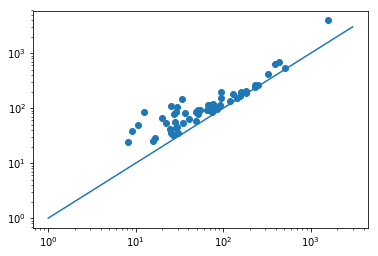

In [109]:
plt.scatter(df[df.st==7].ed_rec, df[df.st==7].ed_corr)
plt.plot([1,3e3],[1,3e3])
plt.yscale("log")
plt.xscale("log")

In [ ]:
plt.hist(df.recovery_probability, bins=np.linspace(0,1,6), histtype="step");

# target-wise FFDs

In [17]:
h = df.groupby("TIC").TIC.count().sort_values(ascending=False).head(8)
h

TIC
142052876    59
388857263    32
29928567     30
167894019    26
272349442    20
29780677     20
220429097    13
395130640     8
Name: TIC, dtype: int64

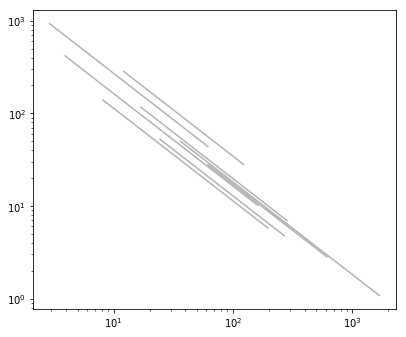

In [18]:
p = []
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6.5,5.5), sharex=True, sharey=True, squeeze=True)
s, c = 4, "k"
for TIC in h.index:
    d = df[df.TIC==TIC]
    tobs =  d.time_years.iloc[0]
    ffd = FFD(f=d, tot_obs_time=tobs)
    ffd.alpha, ffd.alpha_err = 2., 0.2
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=False)
    _beta, ffd.beta, ffd.beta_err = ffd.fit_beta_to_powerlaw(ed, freq*ffd.tot_obs_time)
    a, x, y = ffd.plot_powerlaw(ax, ed, c=c, alpha=0.3)
    p.append([x,y])
len(p)
plt.xscale('log')
plt.yscale('log')

# SpT wise FFDs


In [110]:
h = df.groupby("st").st.count().sort_values(ascending=False).head(4)
h

st
6.0    243
7.0     55
8.0     10
9.0      5
Name: st, dtype: int64

In [111]:
df = df[~np.isnan(df.recovery_probability) & (df.recovery_probability > 0.2)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr) & (df.ed_rec > 5)]
df = df[df.istop-df.istart > 2]

6.0 6.968020381778084
7.0 2.4967830253251204
8.0 1.2897064415544905
9.0 0.3939539128450833


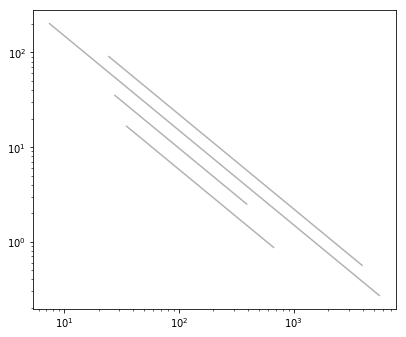

In [112]:
p = []
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6.5,5.5), sharex=True, sharey=True, squeeze=True)
s, c = 4, "k"
for st in h.index:
    d = df[df.st==st]
    tobs =  sttobs[str(int(st))]
    print(st,tobs)
    ffd = FFD(f=d, tot_obs_time=tobs, ID="TIC")
    ffd.alpha, ffd.alpha_err = 2., 0.2
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=True)
    _beta, ffd.beta, ffd.beta_err = ffd.fit_beta_to_powerlaw(ed, freq*ffd.tot_obs_time)
    a, x, y = ffd.plot_powerlaw(ax, ed, c=c, alpha=0.3)
    p.append([x,y])
len(p)
plt.xscale('log')
plt.yscale('log')

6.0
7.0
8.0
9.0


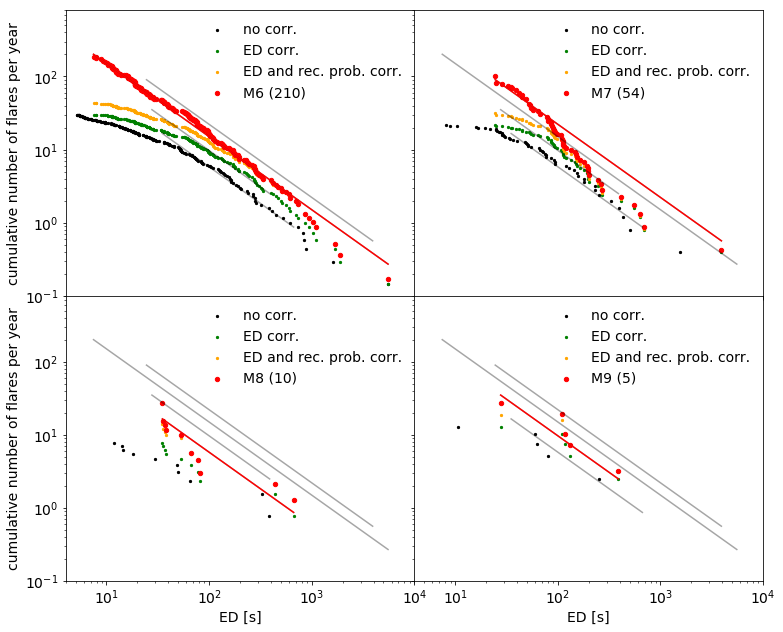

In [119]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12.5,10.5), sharex=True, sharey=True, squeeze=True)
s, c = 19, "r"
axes = [i for ax in axes for i in ax]
for ax,st in zip(axes,h.index):
    print(st)
    d = df[df.st==st]
    tobs =  sttobs[str(int(st))]
    ffd = FFD(f=d, tot_obs_time=tobs, ID="TIC")
    ffd.alpha, ffd.alpha_err = 2., 0.2
    #--------------------------------------------------------------------------
    ed, freq, counts = ffd.ed_and_freq(energy_correction=False,
                                recovery_probability_correction=False,
                                 multiple_stars=False)
    
    ax.scatter(ed, freq, c="k", s=5, label="no corr.")
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=False,
                                 multiple_stars=False)
    
    ax.scatter(ed, freq, c="g", s=5, label="ED corr.")
    
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=False)
    
    ax.scatter(ed, freq, c="orange", s=5, label="ED and rec. prob. corr.")
        #--------------------------------------------------------------------------
    
    ed, freq, counts = ffd.ed_and_freq(energy_correction=True,
                                recovery_probability_correction=True,
                                 multiple_stars=True)
    for plot in p:
        ax.plot(plot[0],plot[1],c="k",alpha=.35)
    _beta, ffd.beta, ffd.beta_err = ffd.fit_beta_to_powerlaw(ed, freq*ffd.tot_obs_time)
    ax.scatter(ed, freq, c=c,label=f"M{int(st)} ({len(ed)})", s=s)
    ffd.plot_powerlaw(ax, ed, c=c, alpha=1)
    
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.legend(frameon=False, fontsize=14)
    plt.setp(ax.get_xticklabels(), fontsize=14)
    plt.setp(ax.get_yticklabels(), fontsize=14)
    ax.set_xlabel("ED [s]", fontsize=14)#"flare energy in TESS band [erg]")
axes[0].set_ylabel("cumulative number of flares per year", fontsize=14)
axes[2].set_ylabel("cumulative number of flares per year", fontsize=14)
plt.ylim(1e-1,8e2)
plt.xlim(4,1e4)

fig.subplots_adjust(hspace=0, wspace=0)
#plt.tight_layout(pad=0.01, w_pad=0., h_pad=-0.5)
plt.savefig(f"../plots/{tstamp}_ffds_spts.png",dpi=300)

In [ ]:
d = df[df.TIC==h.index[0]]
tobs =  d.groupby(["sector"]).total_n_valid_data_points.apply(lambda x: x.iloc[0]).sum()/30./24./365.25

ffd = FFD(f=d, tot_obs_time=tobs)
fig, ax = plt.subplots(1,figsize=(8.5,7.5))
ed, freq, counts = ffd.ed_and_freq( energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)
a, sig_a = ffd.fit_powerlaw(d.ed_rec.values)
ffd.alpha, ffd.alpha_err = a, sig_a
ispowerlaw = ffd.is_powerlaw(d.ed_rec.values)
truncated = ffd.is_powerlaw_truncated(d.ed_rec.values)
print(a, sig_a, ispowerlaw, truncated)

ax.plot(ed, freq, c="c", label="no correction")

ed, freq, counts = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=False,
                             multiple_stars=False)
a, sig_a = ffd.fit_powerlaw(d.ed_corr.values)
ffd.alpha, ffd.alpha_err = a, sig_a
ispowerlaw = ffd.is_powerlaw(d.ed_corr.values)
truncated = ffd.is_powerlaw_truncated(d.ed_corr.values)
print(a, sig_a, ispowerlaw, truncated)

ax.plot(ed, freq, c="r", label="ED correction")


eds, freq = [], []
for n, ED, f in zip(np.rint(5*(1/d.recovery_probability)), 
                    df.ed_corr.sort_values(ascending=True), 
                    (1./d.recovery_probability).values):
    eds.append(int(n)*[ED])
    freq.append(int(n)*[f])
    
eds = np.array([i  for a in eds for i in a])
freq = np.array([i  for a in freq for i in a])
print(len(eds))
a, sig_a = ffd.fit_powerlaw(eds)
ffd.alpha, ffd.alpha_err = a, sig_a*1e13
ispowerlaw = ffd.is_powerlaw(eds)
truncated = ffd.is_powerlaw_truncated(eds)
print(a, sig_a, ispowerlaw, truncated)
ed, freq, counts = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=False)
_beta, ffd.beta, ffd.beta_err = ffd.fit_beta_to_powerlaw(ed, freq)
ax.plot(ed, freq, c="k", label="ED and rec. prob. correction")
ffd.plot_powerlaw(ax, ed)

plt.xscale('log')
plt.yscale('log')
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares per year")

In [ ]:
df = df[~np.isnan(df.recovery_probability) & (df.recovery_probability > 0.2)]
df = df.sort_values(by="ed_corr", ascending=False)
df = df[~df.ed_corr.isnull() & np.isfinite(df.ed_corr) & (df.ed_corr > 6)]

ffd = FFD(df,ID="TIC")
ffd.alpha, ffd.alpha_err = 2., .2
ffd.tot_obs_time = 1.

fig, ax = plt.subplots(1,figsize=(8.5,7.5))

# No correction, single star mode
ed, freq, counts = ffd.ed_and_freq( energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.plot(ed, freq, c="c", label="no correction",alpha=.2)
_beta, ffd.beta, beta_err = ffd.fit_beta_to_powerlaw(ed,freq, mode="ED")
ffd.plot_powerlaw(ax, ed, c="k", alpha=.2,)
plt.xscale('log')
plt.yscale('log')

In [ ]:
a, sig_a = ffd.fit_powerlaw(df.ed_rec.values)
ispowerlaw = ffd.is_powerlaw(df.ed_rec.values)
truncated = ffd.is_powerlaw_truncated(df.ed_rec.values)

print(a, sig_a, ispowerlaw, truncated)

In [ ]:
ed, freq, counts = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=True)
eds = []
for n, ED in zip(np.rint((1/counts)*56), df.ed_rec.sort_values(ascending=True)):
    eds.append(int(n)*[ED])
eds =[i  for a in eds for i in a]

In [ ]:
len(eds)

In [ ]:
a, sig_a = ffd.fit_powerlaw(eds)
a, sig_a

In [ ]:
ffd.alpha = a
ffd.alpha_err = sig_a

In [ ]:
ispowerlaw = ffd.is_powerlaw(np.array(eds))
ispowerlaw

In [ ]:
truncated = ffd.is_powerlaw_truncated(eds)

print(a, sig_a, ispowerlaw, truncated)

In [ ]:
_get_multistar_factors(df, "TIC", "ed_corr")


In [ ]:
# ED correction, single star mode
ed, freq = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=False,
                             multiple_stars=False)
ax.scatter(ed, freq, c="c", label="ED correction",alpha=.5)
_beta, beta, beta_err = ffd.fit_beta_to_powerlaw(ed,freq, mode="ED")
ffd.plot_powerlaw(ax, ed, c="k",alpha=.5, )


# ED and recprob correction, single star mode
ed, freq = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=False)
ax.scatter(ed, freq, c="c",alpha=1, label="ED and recprob correction")
_beta, beta, beta_err = ffd.fit_beta_to_powerlaw(ed,freq, mode="ED")
ffd.plot_powerlaw(ax, ed, c="k",alpha=1, )




# No correction, multiple star mode
ed, freq = ffd.ed_and_freq( energy_correction=False,
                            recovery_probability_correction=False,
                             multiple_stars=True)
ax.scatter(ed, freq, c="r", label="no correction",alpha=.2)
_beta, beta, beta_err = ffd.fit_beta_to_powerlaw(ed,freq, mode="ED")
ffd.plot_powerlaw(ax, ed, c="k", alpha=.2, )

# ED correction, multiple star mode
ed, freq = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=False,
                             multiple_stars=True)
ax.scatter(ed, freq, c="r", label="ED correction",alpha=.5)
_beta, beta, beta_err = ffd.fit_beta_to_powerlaw(ed,freq, mode="ED")
ffd.plot_powerlaw(ax, ed, c="k",alpha=.5, )


# ED and recprob correction, multiple star mode
ed, freq = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=True)
ax.scatter(ed, freq, c="r",alpha=1, label="ED and recprob correction")
_beta, beta, beta_err = ffd.fit_beta_to_powerlaw(ed,freq, mode="ED")
ffd.plot_powerlaw(ax, ed, c="k",alpha=1, )


plt.xscale('log')
plt.yscale('log')
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares per year")
# #plt.title(spt)
plt.legend(fontsize=14)
# #     plt.figure(figsize=(6.5,5.5))
# #     plt.hist(df.TESSmag)
# #     plt.title(spt)

# plt.ylim(.1,1e3)
# plt.xlim(1,10000)
# # for x,z in zip(a,f):
# #     print(x,z)
# # print(df.shape)
# plt.savefig(f"../plots/{tstamp}_FFD_two_step_correction.png".format(tstamp), dpi=300)

In [ ]:
ed, freq = ffd.ed_and_freq( energy_correction=True,
                            recovery_probability_correction=True,
                             multiple_stars=True)
ffd.is_powerlaw(ed),  ffd.is_powerlaw_truncated(ed)

In [ ]:
#df = df[df.recovery_probability > .2]


df = df.sort_values(by="ed_rec", ascending=False)
#df['probnocorrcum'] = np.cumsum(1/np.array(freq[::-1])*freq[-1])
df['probnocorrcum'] = np.cumsum(np.ones_like(freq))
df['sortededrec'] =df.ed_rec.sort_values(ascending=False)
df = df.sort_values(by="ed_corr", ascending=False)
df = df[(~df.ed_corr.isnull()) & (np.isfinite(df.ed_corr)) & (df.recovery_probability >0.0) ]
df["ed_corrprob"] = 1/df.recovery_probability.values
df["ed_corrprob_err"] = df.recovery_probability_std / df.recovery_probability**2
df["ed_corrprobcum"] = np.cumsum(df.ed_corrprob.values)


plt.figure(figsize=(6.5,5.5))
for l, row in df.iterrows():
    plt.plot([row.sortededrec, row.ed_corr], [row.probnocorrcum, row.ed_corrprobcum],c="grey",alpha=.5)
plt.scatter(df["sortededrec"], df["probnocorrcum"], label="no correction", c="k")#, condition {}".format(label))
plt.scatter(df.ed_corr, df["ed_corrprobcum"], label="energy ratio and recovery probability correction", c="r")#, condition {}".format(label))
plt.plot([10, 4000],[4000, 10], label="slope=-1", linestyle="dashed", c="grey", linewidth=3)
plt.xscale('log')
plt.yscale('log')
#plt.ylim(.8,250)
#plt.xlim(5,4000)
plt.xlabel("ED [s]")#"flare energy in TESS band [erg]")
plt.ylabel("cumulative number of flares")
plt.legend()
#plt.savefig("plots/{}_FFD_flare_correspondence_correction.png".format(today), dpi=300)

In [ ]:
f
